## Intro

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pickle
import os

In [2]:
# save_dir_nocl = 'results-pre-overtraining/nocl-seed0'
# save_dir_proj = 'results-pre-overtraining/proj-seed0'
# 
# save_dir_nocl = 'results-pre-overtraining/nocl-seed1'
# save_dir_proj = 'results-pre-overtraining/proj-seed1'

# saved every 25 instead of every 10
save_dir_nocl = '2023-08-01T17:43:58_plain'
save_dir_proj = '2023-08-01T17:44:08_proj'

# save_dir_nocl = '2023-08-01T23:39:47_plain-overtrain500'
# save_dir_proj = '2023-08-01T23:41:14_proj-overtrain500'

# save_dir_nocl = '2023-07-31T19:40:49_nocl-overtrain1000'
# save_dir_proj = '2023-07-31T19:40:59_proj-overtrain1000'


In [3]:
# Get convergence numbers

conv_plain_f = os.path.join('..', 'data', save_dir_nocl, 'conv.txt')
conv_cl_f = os.path.join('..', 'data', save_dir_proj, 'conv.txt')

conv_plain = np.loadtxt(conv_plain_f)
conv_cl = np.loadtxt(conv_cl_f)

In [4]:
perfs_nocl_f = os.path.join('..', 'data', save_dir_nocl, 'perfs', '30.pkl')
perfs_proj_f = os.path.join('..', 'data', save_dir_proj, 'perfs', '30.pkl')

with open(perfs_nocl_f,'rb') as fp:
    perfs_plain = pickle.load(fp)

with open(perfs_proj_f,'rb') as fp:
    perfs_cl = pickle.load(fp)

## Number of trias per task to convergence

In [6]:
addition = np.arange(50, 50*(len(conv_plain)+1), 50)
conv_plain_cumsum = np.cumsum(conv_plain)
conv_plain_added = conv_plain_cumsum + addition

addition = np.arange(50, 50*(len(conv_cl)+1), 50)
conv_cl_cumsum = np.cumsum(conv_cl)
conv_cl_added = conv_cl_cumsum + addition

# conv_plain_added = np.cumsum(conv_plain)
# conv_cl_added = np.cumsum(conv_cl)

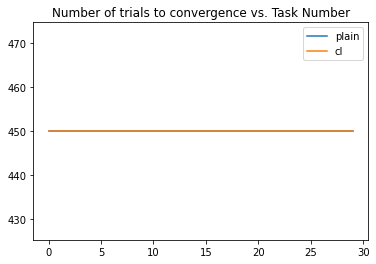

In [194]:
plt.figure(facecolor='white')
plt.plot(conv_plain, label='plain')
plt.plot(conv_cl, label='cl')
plt.legend()
plt.title("Number of trials to convergence vs. Task Number")

# if not os.path.exists(os.path.join('analysis', save_dir_nocl, 'imgs')):
#     os.makedirs(os.path.join('analysis', save_dir_nocl, 'imgs'))
# if not os.path.exists(os.path.join('analysis', save_dir_proj, 'imgs')):
#     os.makedirs(os.path.join('analysis', save_dir_proj, 'imgs'))

# plt.savefig(os.path.join('analysis', save_dir, 'imgs', f"conv-comparison_seed{seed}.png"))

plt.show()

## Loss on task $i$ vs time

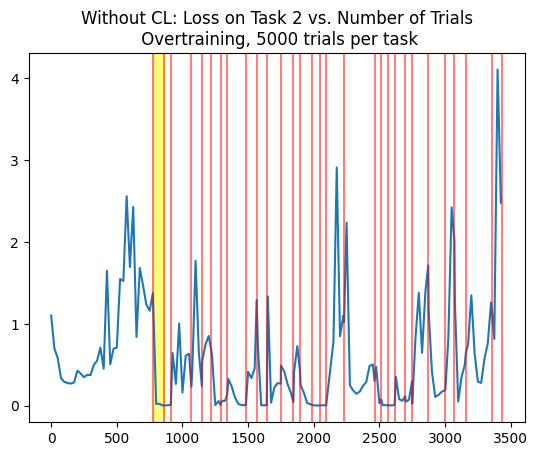

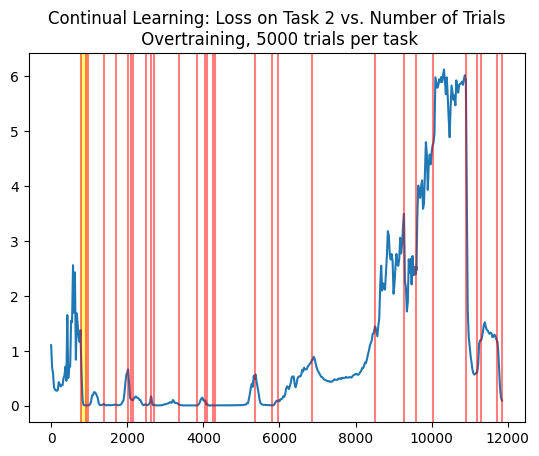

In [15]:
# k = 13
k = 1

plt.figure(facecolor='white')
plt.plot(perfs_plain['trials'], list(map(lambda x: np.mean(x), perfs_plain[k])), label='plain')
for index in conv_plain_cumsum:
    plt.axvline(x=index, color='r', alpha=0.5)
lowerbd = conv_plain_cumsum[k-1] if k > 0 else 0
plt.axvspan(lowerbd, conv_plain_cumsum[k], color='yellow', alpha=0.5)
# plt.ylim(0, 6)
plt.title(f"Without CL: Loss on Task {k+1} vs. Number of Trials\n Overtraining, 5000 trials per task")
# plt.savefig(os.path.join('data', save_dir, 'imgs', f"no-cl_task{k+1}_seed{seed}.png"))
plt.show()

plt.figure(facecolor='white')
plt.plot(perfs_cl['trials'], list(map(lambda x: np.mean(x), perfs_cl[k])), label='cl')
for index in conv_cl_cumsum:
    plt.axvline(x=index, color='r', alpha=0.5)
lowerbd = conv_cl_cumsum[k-1] if k > 0 else 0
plt.axvspan(lowerbd, conv_cl_cumsum[k], color='yellow', alpha=0.5)
# plt.ylim(0, 6)
plt.title(f"Continual Learning: Loss on Task {k+1} vs. Number of Trials\n Overtraining, 5000 trials per task")
# plt.savefig(os.path.join('data', save_dir, 'imgs', f"cl_task{k+1}_seed{seed}.png"))
plt.show()

In [76]:
# for k in range(30):
#     plt.figure()
#     plt.plot(plain['trials'], list(map(lambda x: np.mean(x), plain[k])), label='plain')
#     plt.plot(cl['trials'], list(map(lambda x: np.mean(x), cl[k])), label='cl')
#     plt.legend()

## Running average of performance over time

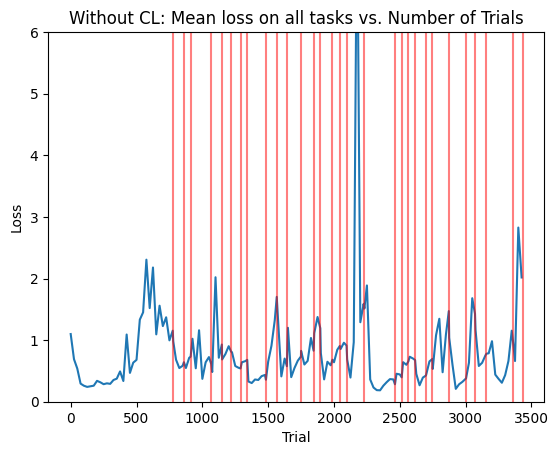

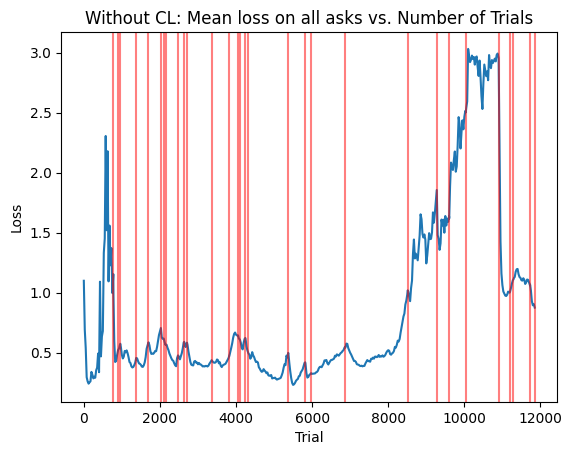

In [11]:
plt.figure(facecolor='white')
plt.plot(
    perfs_plain['trials'],
    # mean over all tasks
    np.mean(np.array([np.mean(np.array(perfs_plain[k]),axis=1) for k in range(30)]),axis=0),
    label='plain'
)
for index in conv_plain_cumsum:
    plt.axvline(x=index, color='r', alpha=0.5)
plt.ylim(0, 6)
# plt.title(f"Without CL: Loss on Task {k+1} vs. Number of Trials\n Overtraining, 5000 trials per task")
# plt.savefig(os.path.join('data', save_dir, 'imgs', f"no-cl_task{k+1}_seed{seed}.png"))
plt.xlabel("Trial")
plt.ylabel("Loss")
plt.title("Without CL: Mean loss on all tasks vs. Number of Trials")
plt.show()

plt.figure(facecolor='white')
plt.plot(
    perfs_cl['trials'],
    np.mean(np.array([np.mean(np.array(perfs_cl[k]),axis=1) for k in range(30)]),axis=0),
    label='plain'
)
for index in conv_cl_cumsum:
    plt.axvline(x=index, color='r', alpha=0.5)
# plt.ylim(0, 6)
# plt.title(f"Continual Learning: Loss on Task {k+1} vs. Number of Trials\n Overtraining, 5000 trials per task")
# plt.savefig(os.path.join('data', save_dir, 'imgs', f"cl_task{k+1}_seed{seed}.png"))
plt.xlabel("Trial")
plt.ylabel("Loss")
plt.title("Without CL: Mean loss on all asks vs. Number of Trials")
plt.show()

[0.00169988 0.02091029 0.04453719 0.5197376  0.60951406 0.73261958
 0.05229514 0.16870973 0.10731634 1.64901233 0.0747973  0.84329057
 0.99829823 1.2670387  0.530981   0.68311107 0.68753332 1.40435302
 0.26178083 0.34966812 0.6036343  0.58075738 0.39033511 0.61895663
 1.57436109 0.34439629 1.49850941 0.79229772 1.00618625]


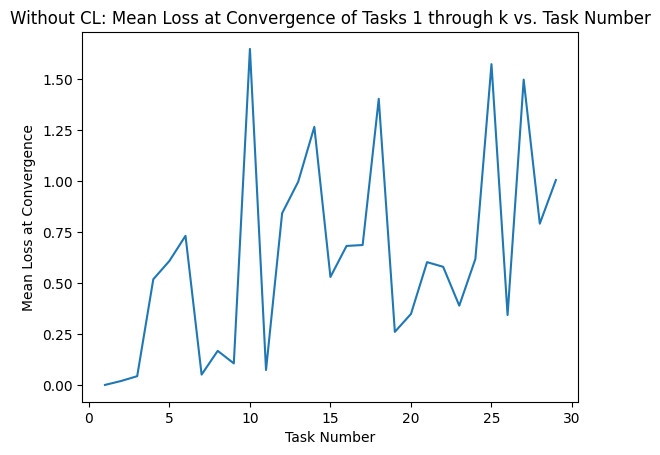

[1.66549021e-03 1.38008475e-01 1.16932936e-01 1.33411875e-02
 7.80960172e-02 3.32841605e-01 3.03753354e-02 3.12056597e-02
 1.12152189e-01 2.36770198e-01 5.08994348e-02 2.14222834e-01
 2.64326364e-01 4.46401089e-01 3.64890426e-01 4.17906314e-01
 2.80819356e-01 3.77492100e-01 3.22079182e-01 2.09545285e-01
 4.64124262e-01 1.12269938e+00 2.05440164e+00 1.67088258e+00
 2.57046080e+00 2.96561790e+00 9.66179013e-01 1.09460902e+00
 1.06327212e+00]


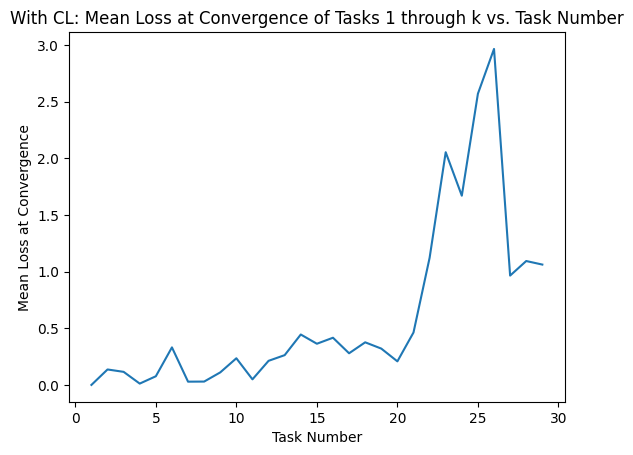

In [13]:
means = np.empty((29,))
for k in range(30-1):
    kth_conv_trial = conv_plain_cumsum[k] 
    kth_conv_trial_idx = perfs_plain['trials'].index(kth_conv_trial)

    perf_taskbytrial = np.array([np.mean(np.array(perfs_plain[i]),axis=1) for i in range(k+1)])
    # take the mean of the performance on each of the k tasks at the kth convergence trial
    means[k] = np.mean(perf_taskbytrial[:,kth_conv_trial_idx])
print(means)

plt.figure(facecolor='white')
plt.plot(range(1, 30), means)
plt.xlabel("Task Number")
plt.ylabel("Mean Loss at Convergence")
plt.title("Without CL: Mean Loss at Convergence of Tasks 1 through k vs. Task Number")
plt.show()

means = np.empty((29,))
for k in range(30-1):
    kth_conv_trial = conv_cl_cumsum[k] 
    kth_conv_trial_idx = perfs_cl['trials'].index(kth_conv_trial)

    perf_taskbytrial = np.array([np.mean(np.array(perfs_cl[i]),axis=1) for i in range(k+1)])
    # take the mean of the performance on each of the k tasks at the kth convergence trial
    means[k] = np.mean(perf_taskbytrial[:,kth_conv_trial_idx])
print(means)

plt.figure(facecolor='white')
plt.plot(range(1, 30), means)
plt.xlabel("Task Number")
plt.ylabel("Mean Loss at Convergence")
plt.title("With CL: Mean Loss at Convergence of Tasks 1 through k vs. Task Number")
plt.show()